# **Problem Set 8**

Daniel de Castro

November 5, 2021

### Problem 1

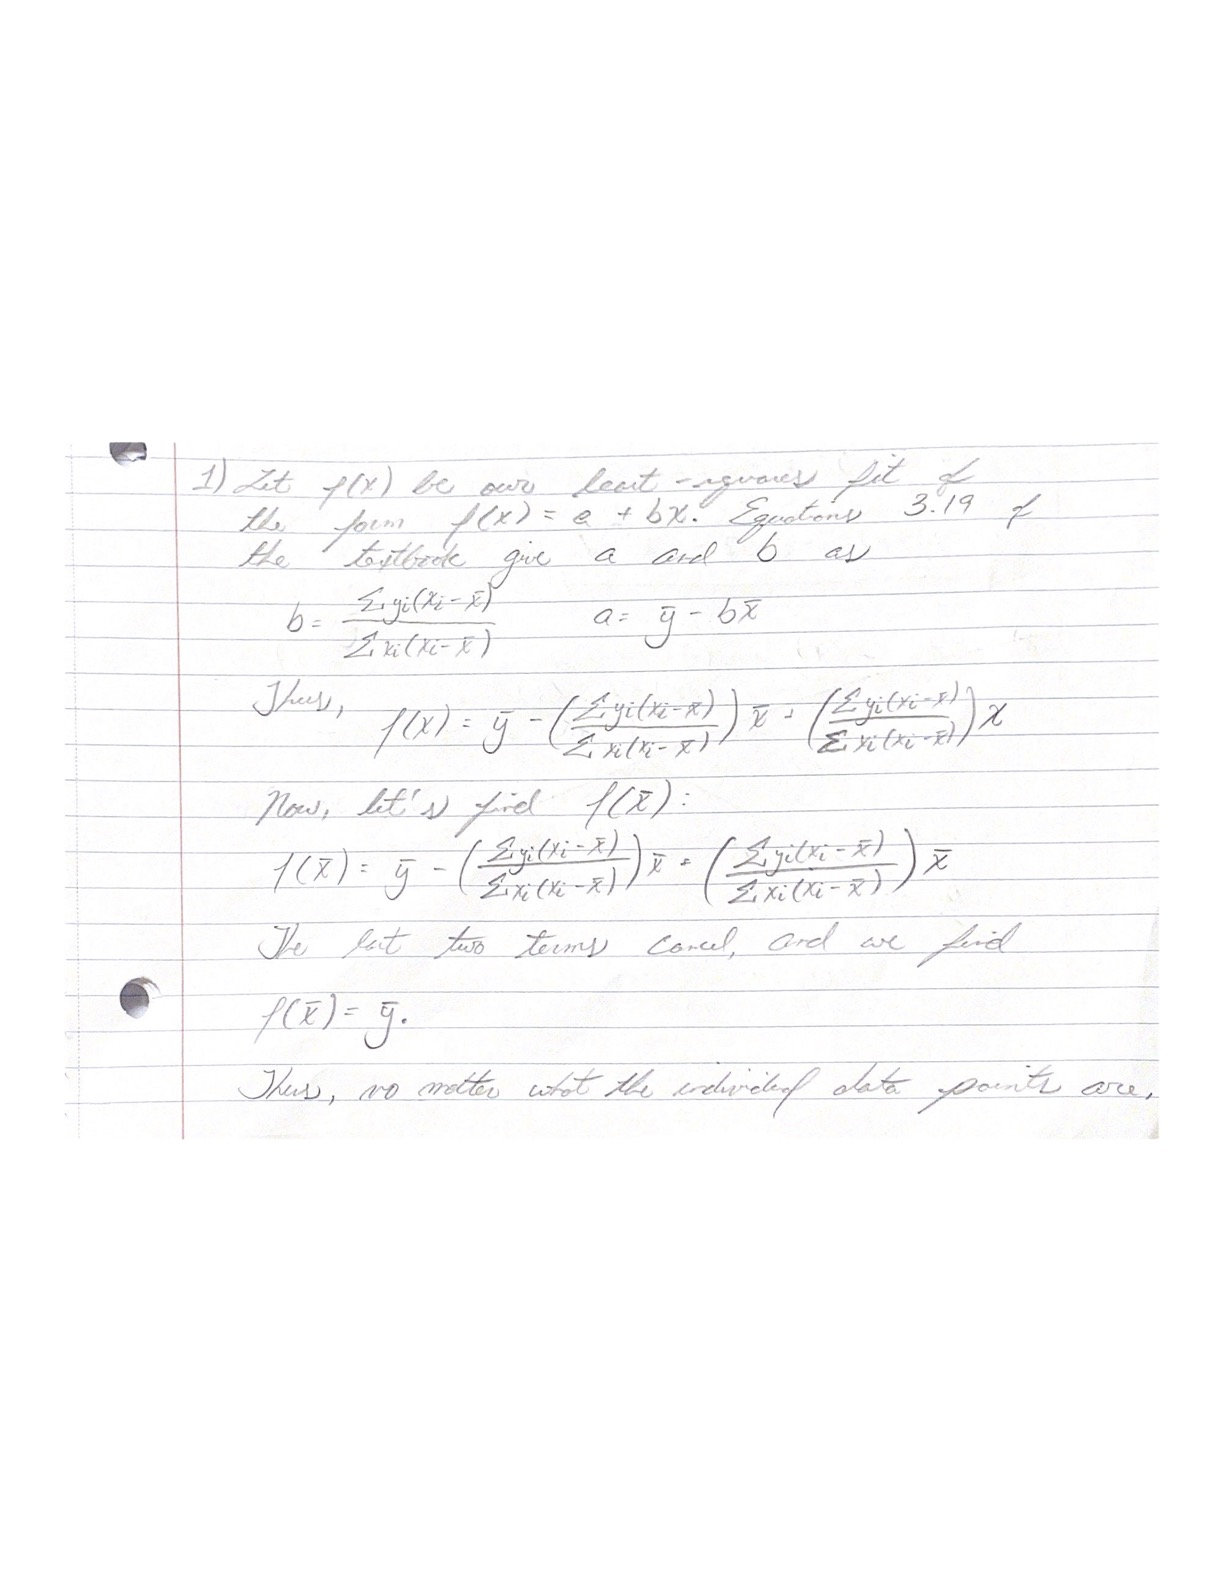

[continuation of handwritten sentence] $y = f(x)$ will always pass through the point $(\bar{x}, \bar{y})$. 

### Problem 2

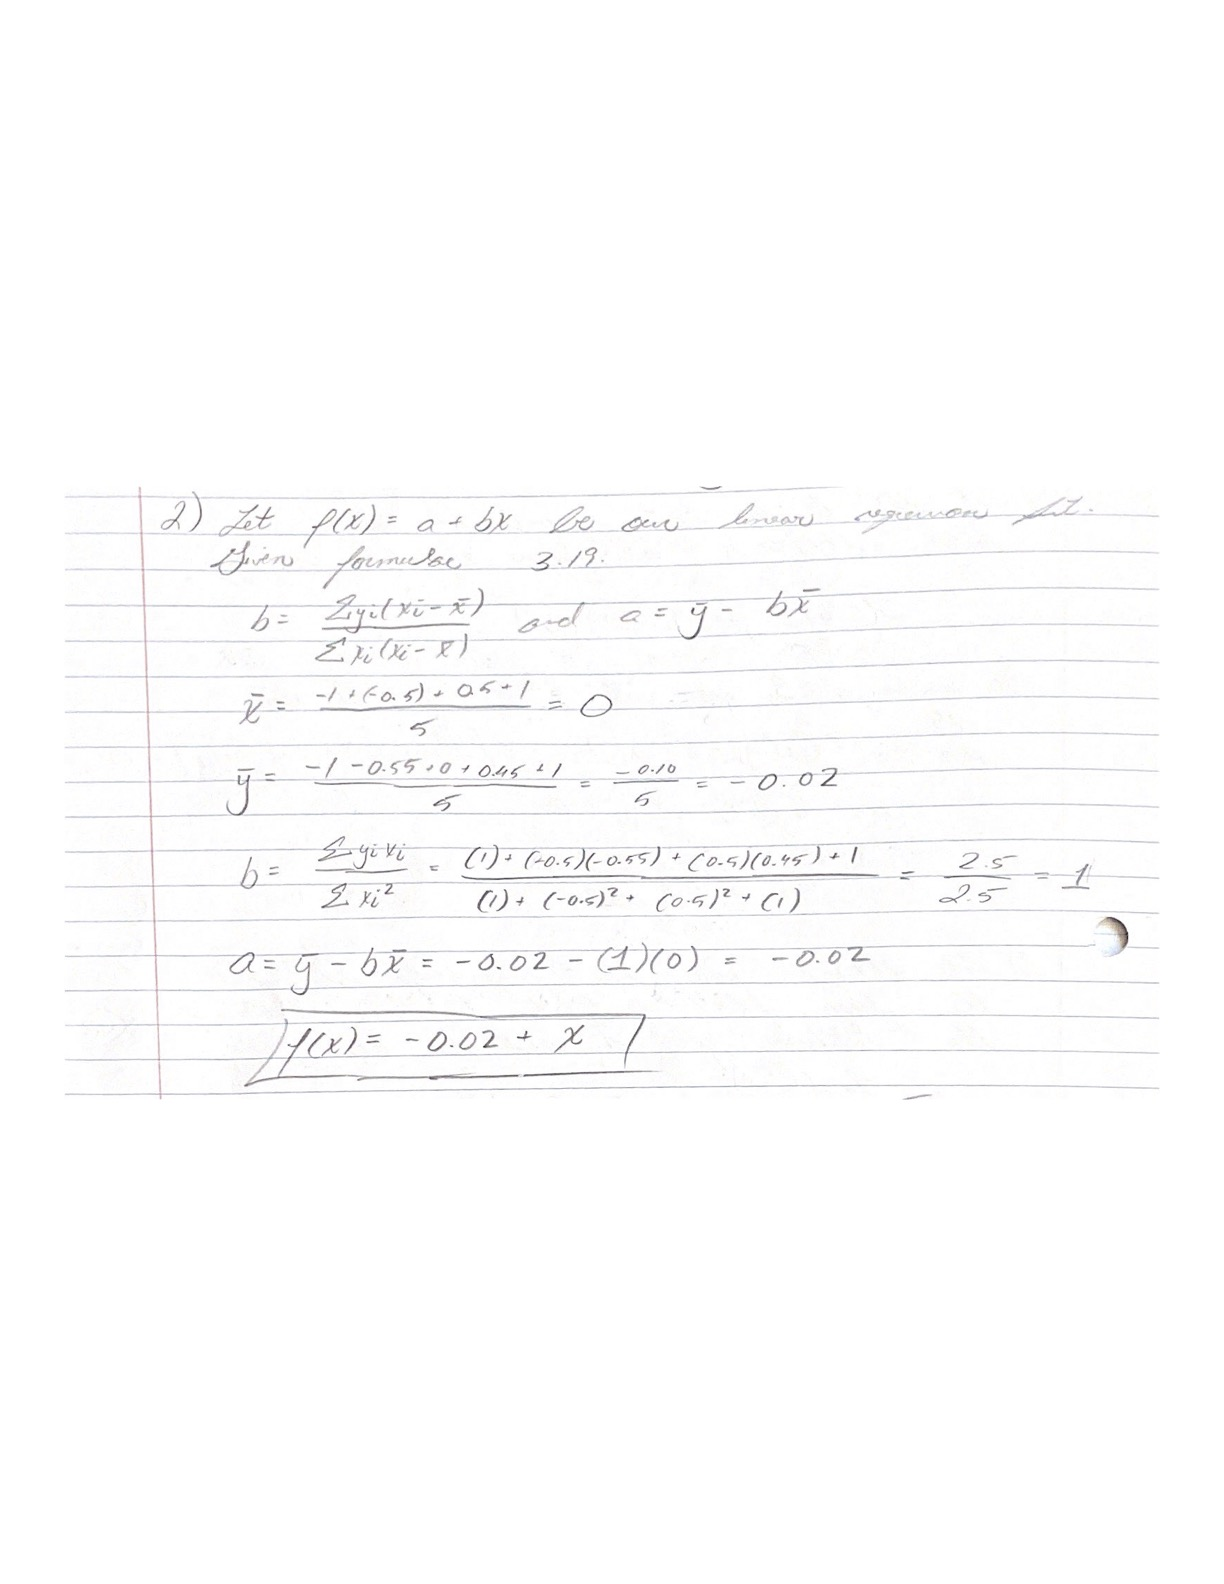

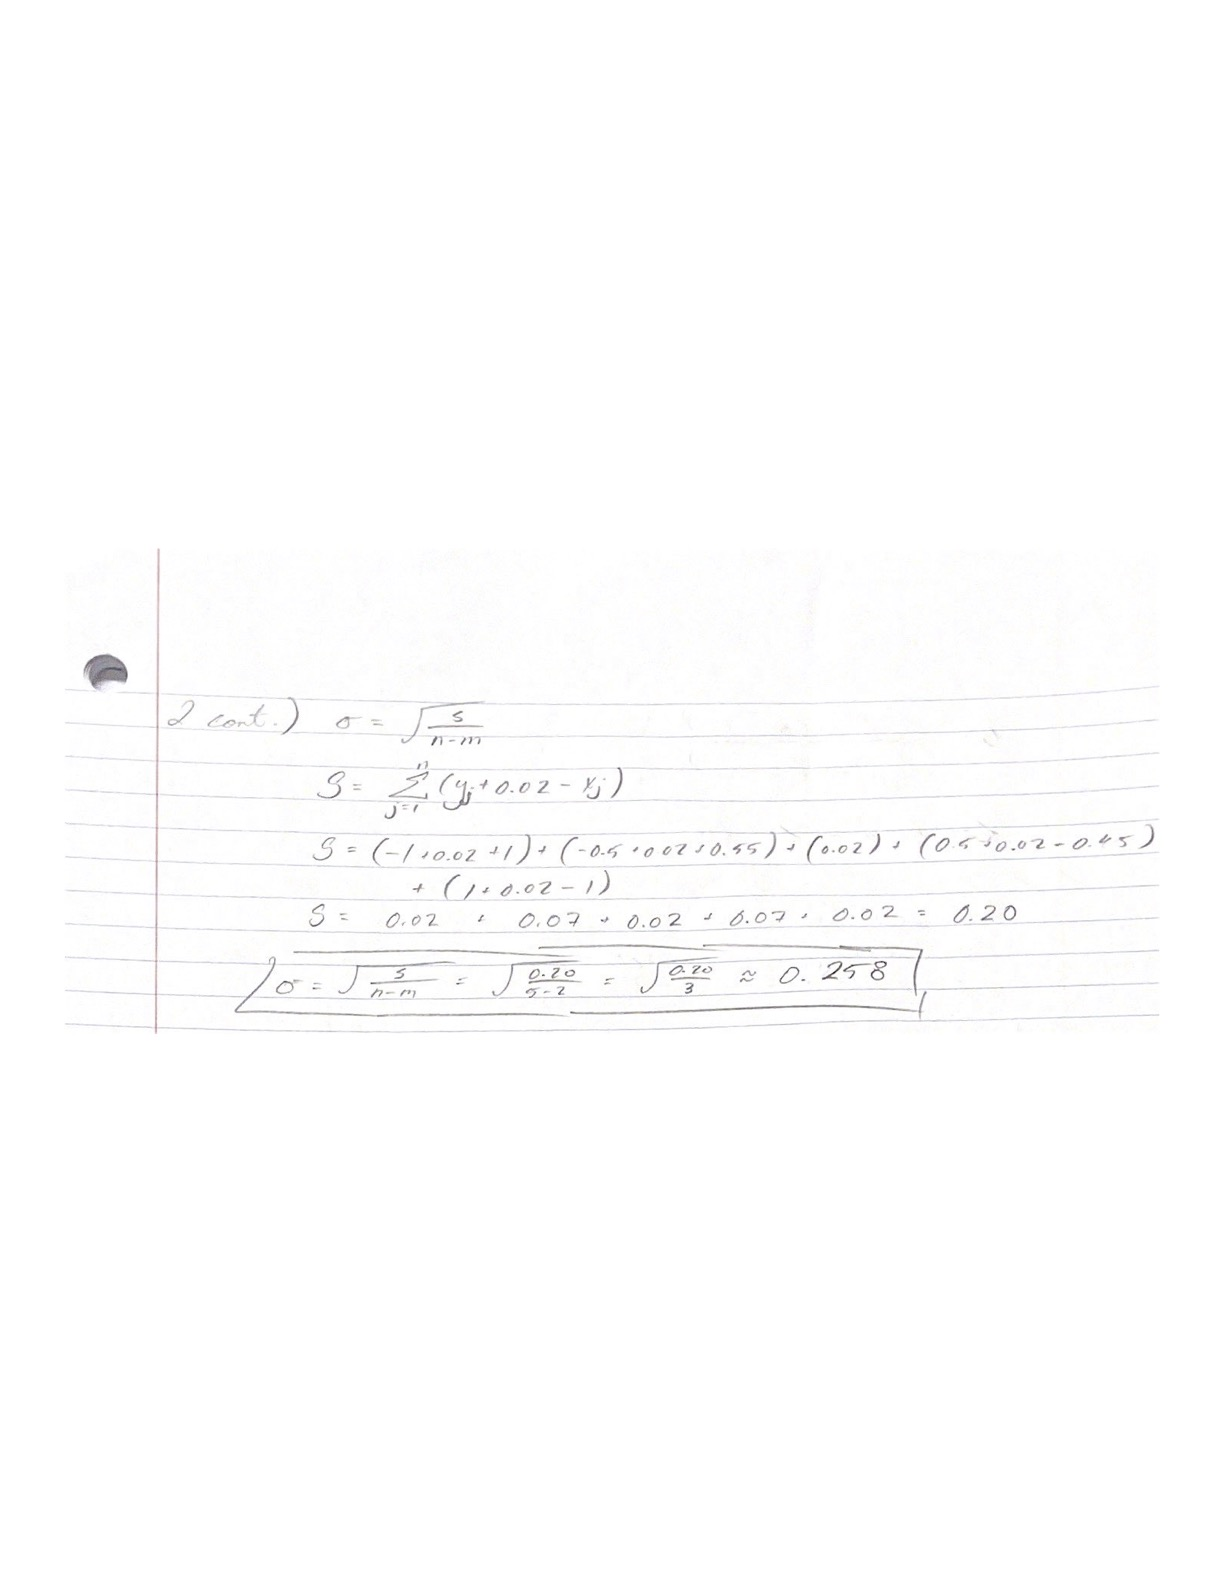

### Problem 5

b = 1.872205882352943
a = -3377.0138235294153


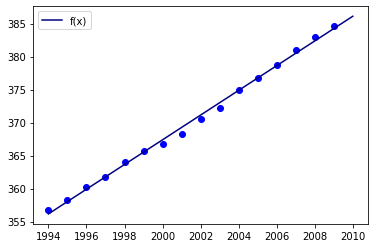

In [19]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

# Define x_data and y_data
x_data = np.arange(1994,2010,1)
y_data = np.array([356.8,358.2,360.3,361.8,364.,365.7,366.7,368.2,370.5,372.2,
                   374.9,376.7,378.7,381.,382.9,384.7])

# Find if f(x) = a + bx, find a and b, and then find f
x_bar = np.mean(x_data)
y_bar = np.mean(y_data)

top_sum = 0
bottom_sum = 0
for i in range(len(x_data)):
  top_sum += y_data[i] * (x_data[i] - x_bar)
  bottom_sum += x_data[i] * (x_data[i] - x_bar)

b = top_sum / bottom_sum 
print("b =", b)

a = y_bar - b * x_bar
print("a =", a)

f = lambda x: a + b * x

# Define x, f(x), and p(x)
x = np.linspace(1994, 2010, 100)

# Configure plot
fig, ax = plt.subplots()

# Plot the data
plt.plot(x_data, y_data, 'bo')

# Plot the linear fit
plt.plot(x, f(x), color="navy", marker=None, linestyle="solid", label="f(x)")

# Add legend and show plot
ax.legend()
plt.show()

Thus, the data can be fit with the first degree polynomial 

$$f(x) = -3377.01 + 1.872x$$

The average increase of concentration per year is the slope of $f(x)$, which is 1.872 ppm per year. 

### Problem 13

Let $f_1(x) = sin(\frac{\pi}{2} x)$ and $f_2(x) = cos(\frac{\pi}{2} x)$. Then $f(x) = a f_1(x) + b f_2(x)$. With the normal equations of the least squares fit, we then have 

$$A\vec{x} = \vec{b}$$

$$A_{j,k} = \sum_{i=1}^n f_j(x_i) f_j(x_i)$$

$$\vec{x} = \begin{bmatrix} a \\ b \end{bmatrix}$$

$$b_{k} = \sum_{i=1}^n f_k(x_i) y_i$$

Now, we can use Python to calculate all the values of $A_{j,k}$ and $b_k$. 

In [20]:
# Define x_data, y_data, A, b, and f = [f_1, f_2]
x_data = np.array([-0.5,-0.19,0.02,0.2,0.35,0.5])
y_data = np.array([-3.558,-2.874,-1.995,-1.040,-0.068,0.677])

A = np.zeros([2,2])
b = np.zeros([2])

f = np.array([lambda x: np.sin(np.pi * x / 2), lambda x: np.cos(np.pi * x / 2)])

# Calculate the values of A and b
for j in range(len(A)):
  for k in range(len(A)):
    for x in x_data:
      A[j,k] += f[j](x) * f[k](x)

for k in range(len(b)):
  for i in range(len(x_data)):
    b[k] += f[k](x_data[i]) * y_data[i]

# Print A and b
print("A =\n", A)
print("\nb =", b)

A =
 [[1.4559426  0.48974946]
 [0.48974946 4.5440574 ]]

b = [ 3.42009707 -7.82521766]


Thus, according to the above calculations, 

$$A = \begin{bmatrix} 1.456 & 0.490 \\ 0.490 & 4.544 \end{bmatrix}$$

and 

$$\vec{b} = \begin{bmatrix} 3.420 \\ -7.825 \end{bmatrix}$$

We now solve the system of equations below.

In [21]:
sol = np.linalg.solve(A, b)
print("x =", sol)

x = [ 3.03849053 -2.04955966]


Thus, 

$$\vec{x} = \begin{bmatrix} a \\ b \end{bmatrix} = \begin{bmatrix} 3.038 \\ -2.050 \end{bmatrix}$$

Now, we can check the accuracy of our fit by graphing the data points and $f(x)$ below. 

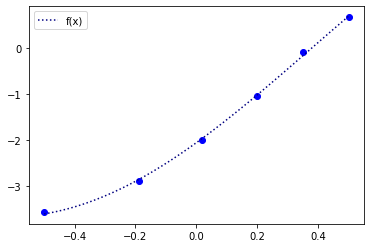

In [22]:
# Find f(x)
g = lambda x: sol[0] * f[0](x) + sol[1] * f[1](x)

# Define x
x = np.linspace(-0.5, 0.5, 100)

# Configure plot
fig, ax = plt.subplots()

# Plot the data
plt.plot(x_data, y_data, 'bo')

# Plot f(x)
plt.plot(x, g(x), color="navy", marker=None, linestyle="dotted", label="f(x)")

# Add legend and show plot
ax.legend()
plt.show()

### Problem 14



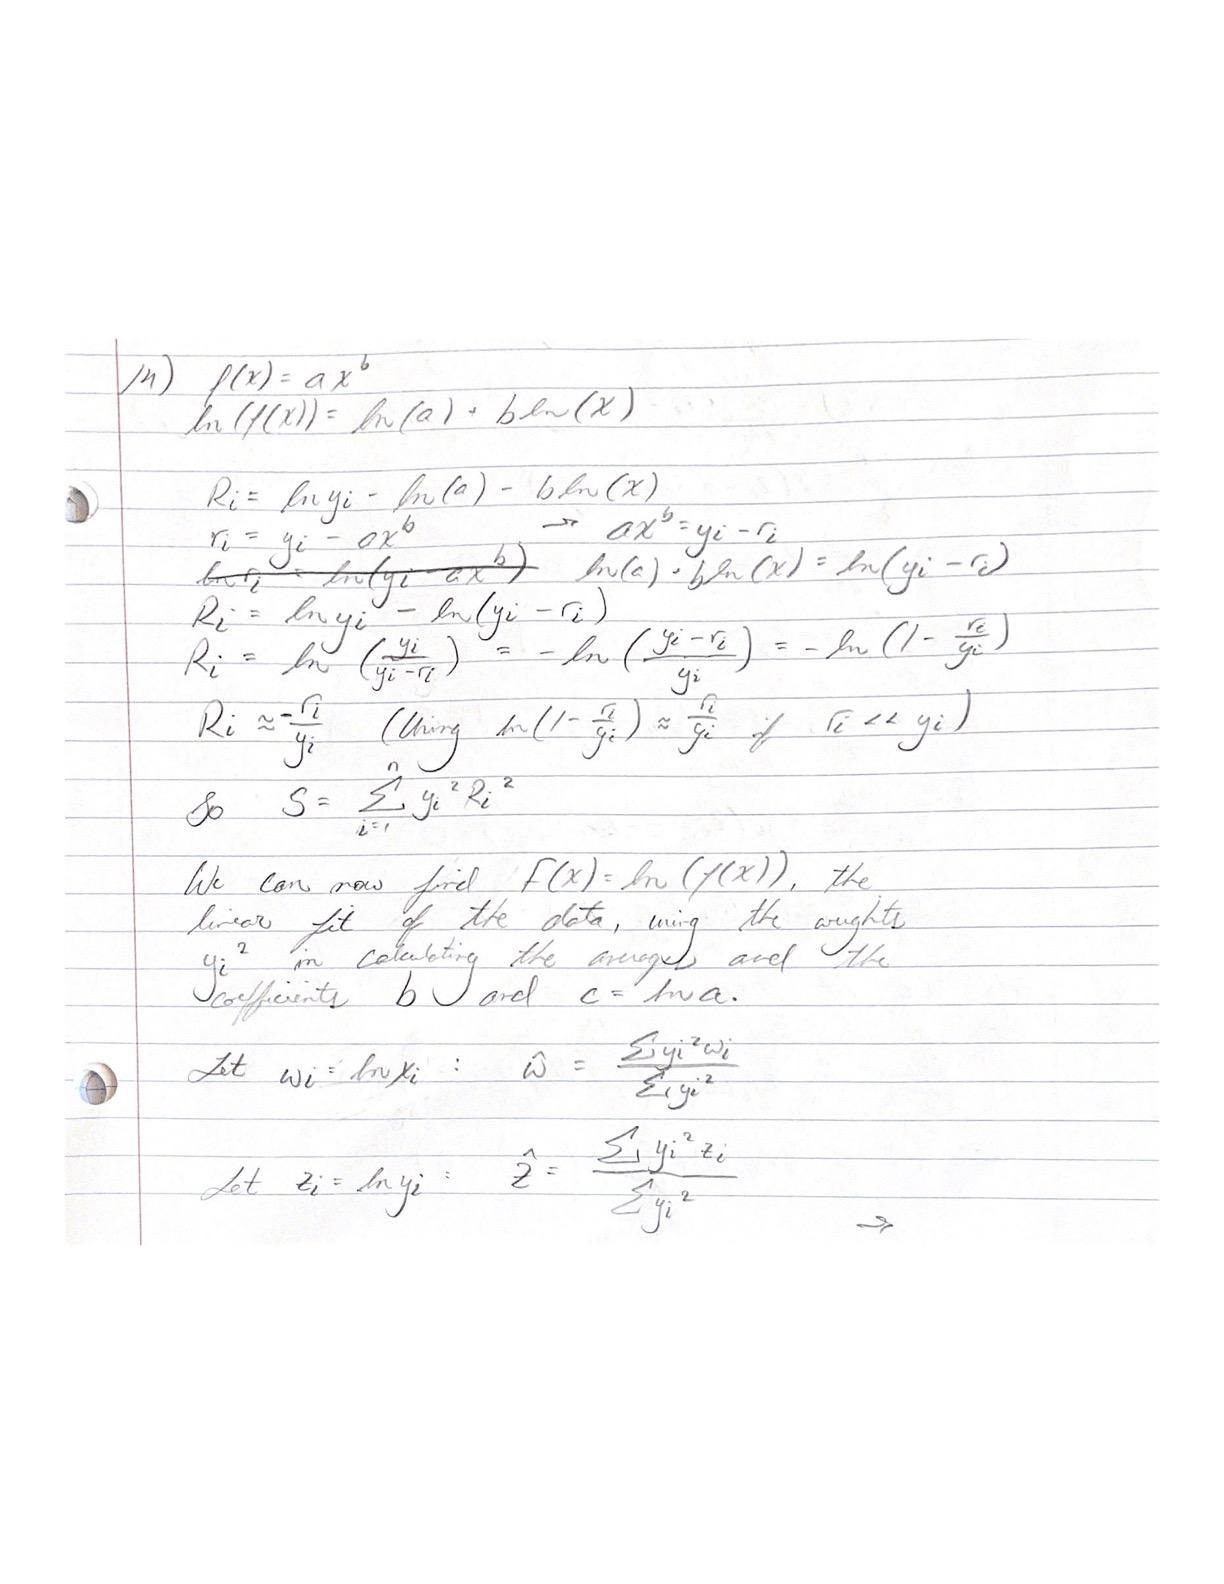

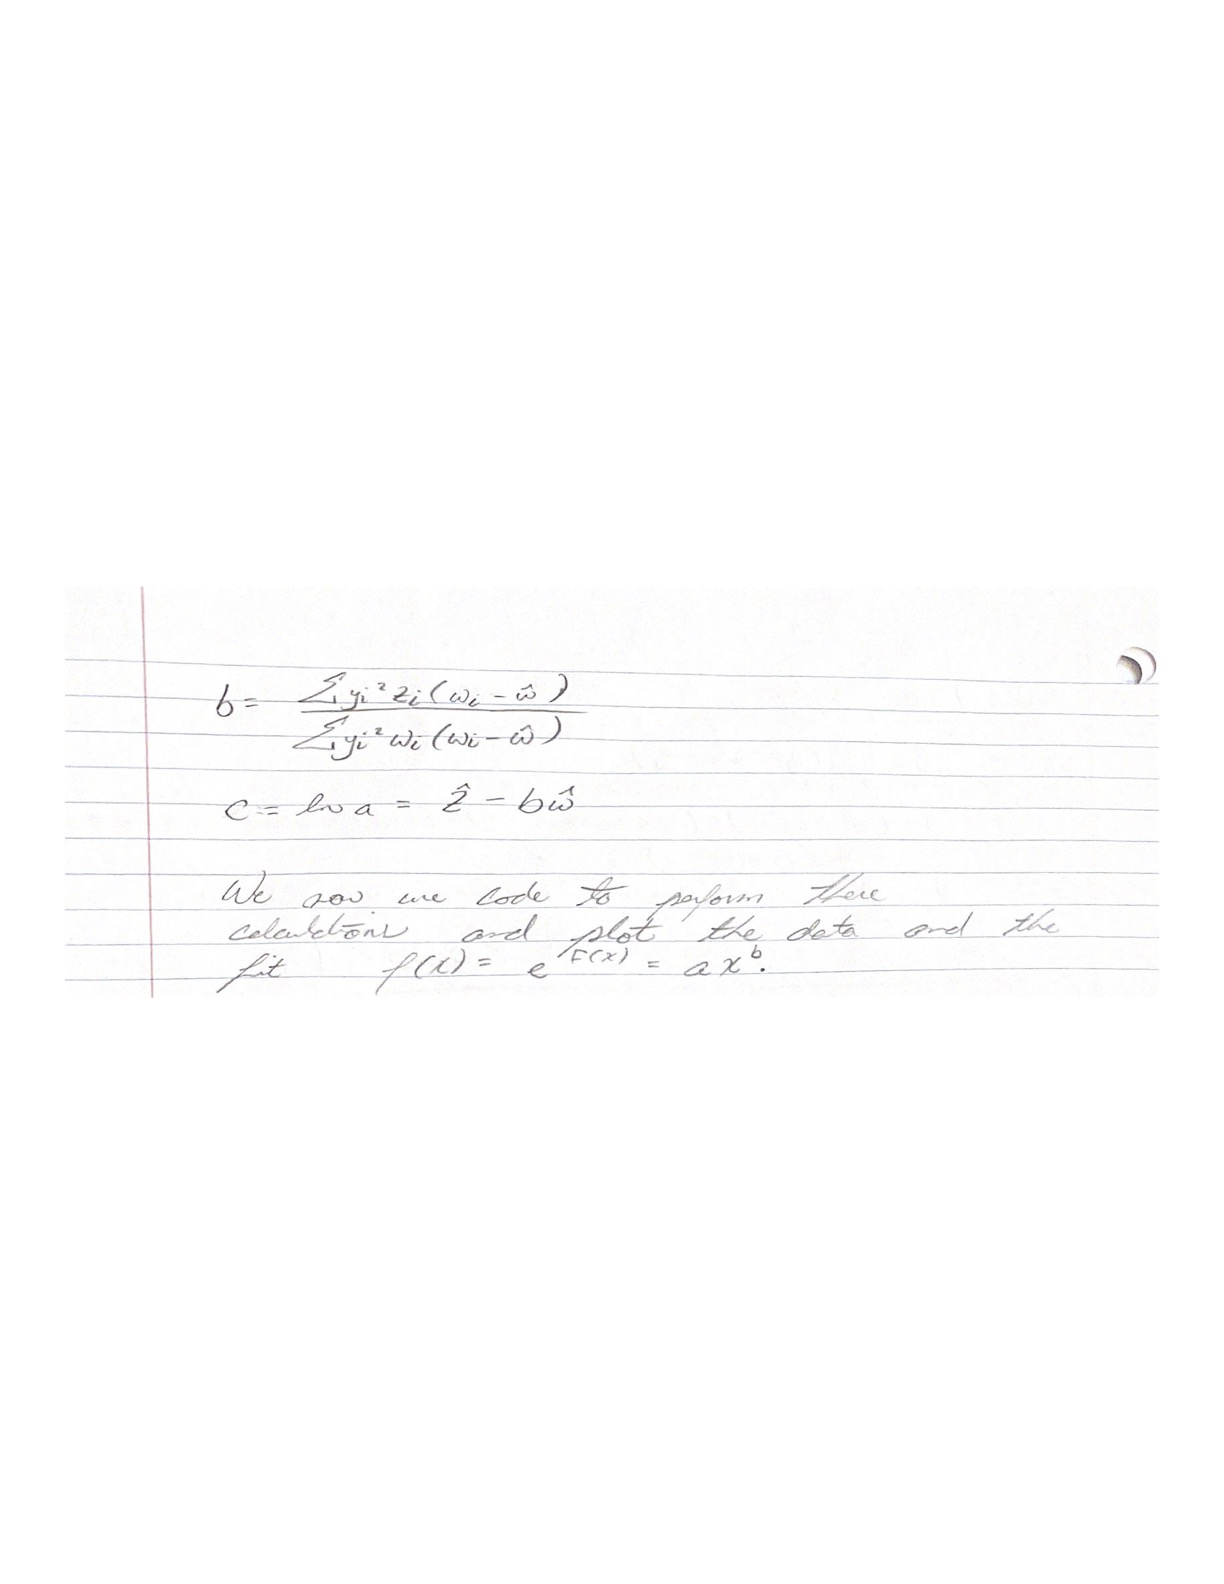

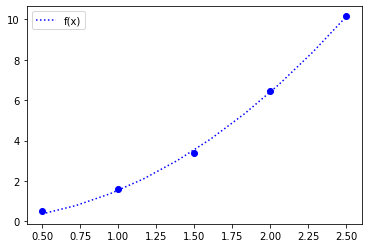

In [23]:
# Define x_data and y_data
x_data = np.arange(0.5,3,0.5)
y_data = np.array([0.49,1.6,3.36,6.44,10.16])

# Calculate w_data and z_data
w_data = np.log(x_data)
z_data = np.log(y_data)

# Find w_chap and z_chap
sum_y2 = 0
for i in range(len(y_data)):
  sum_y2 += y_data[i] ** 2

w_chap = 0
for i in range(len(w_data)):
  w_chap += y_data[i] ** 2 * w_data[i]

w_chap = w_chap / sum_y2

z_chap = 0
for i in range(len(z_data)):
  z_chap += y_data[i] ** 2 * z_data[i]

z_chap = z_chap / sum_y2

# Calculate b, c, and a
top_sum = 0
bottom_sum = 0
for i in range(len(w_data)):
  top_sum += y_data[i] ** 2 * z_data[i] * (w_data[i] - w_chap)
  bottom_sum += y_data[i] ** 2 * w_data[i] * (w_data[i] - w_chap)

b = top_sum / bottom_sum 

c = z_chap - b * w_chap 
a = np.exp(c)

# Find f
f = lambda x: a * x ** b

# Configure plot
fig, ax = plt.subplots()

# Plot the data
plt.plot(x_data, y_data, 'bo')

# Plot the fit
v = np.linspace(0.5,2.5,10)
plt.plot(v, f(v), color="blue", marker=None, linestyle="dotted", label="f(x)")

# Add legend and show plot
ax.legend()
plt.show()

### Problem 17

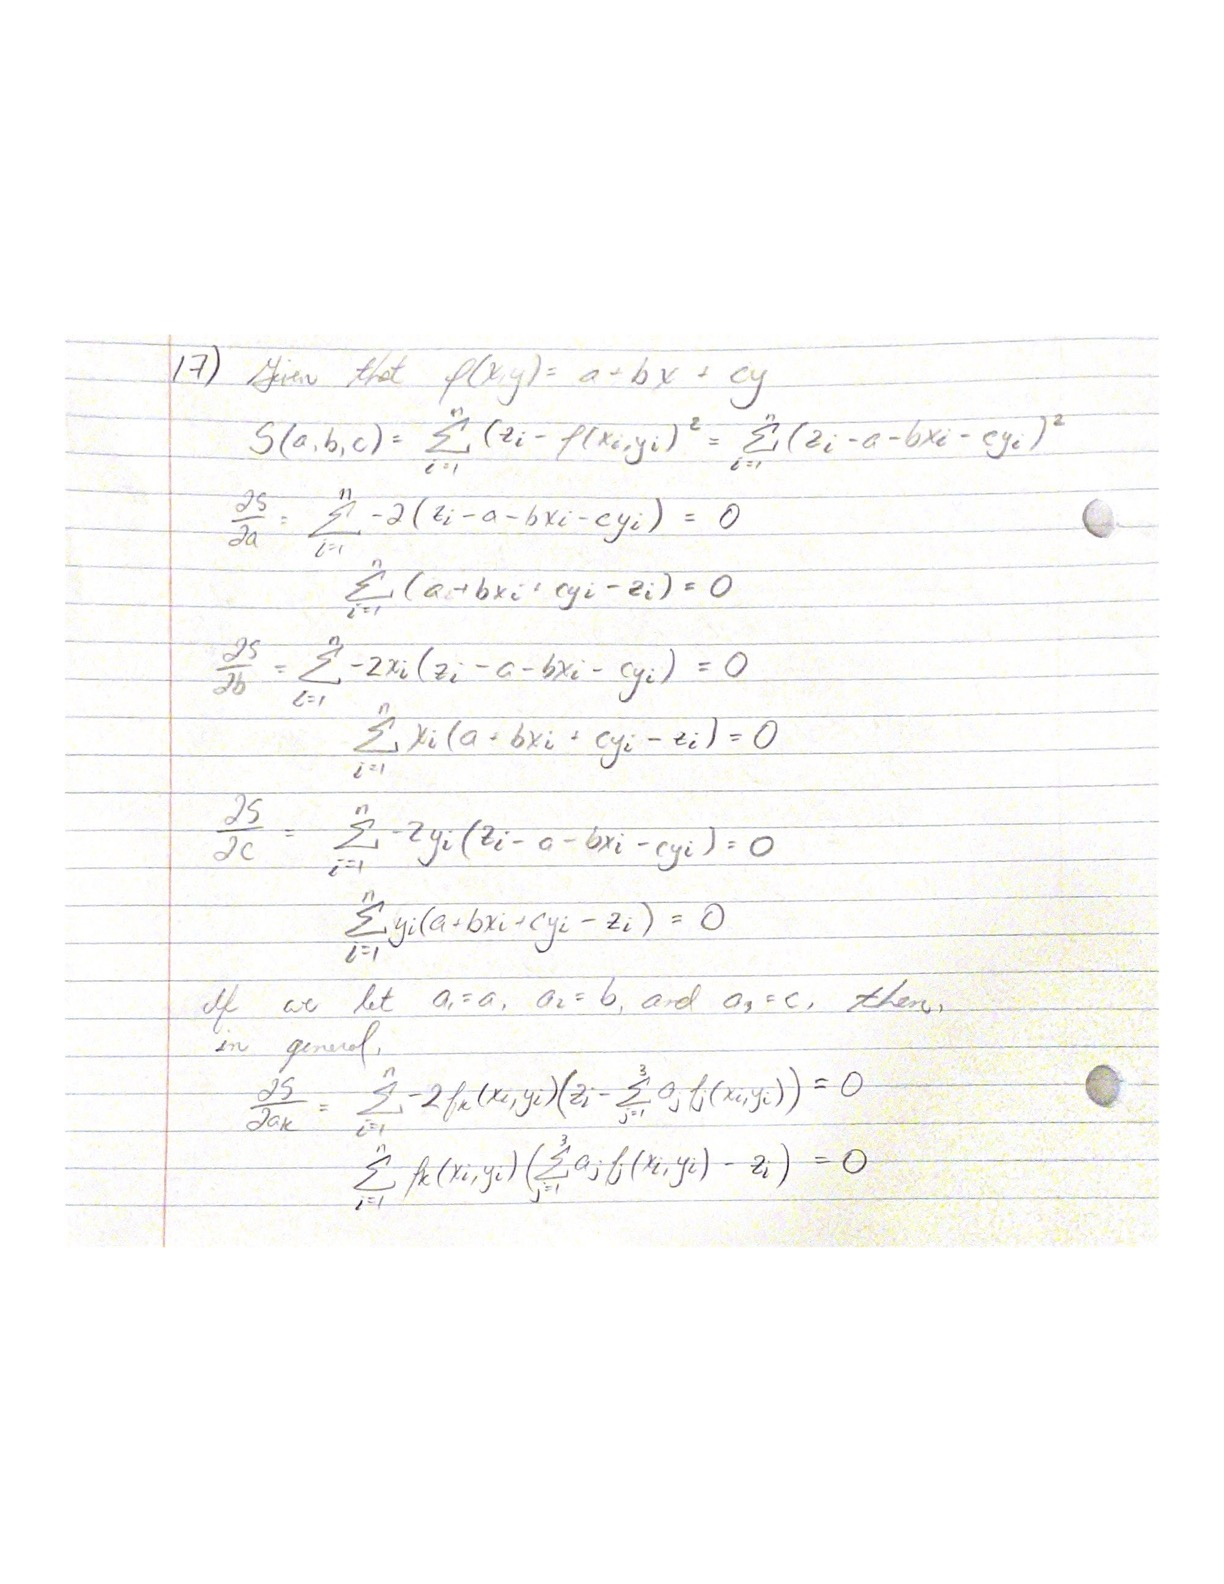

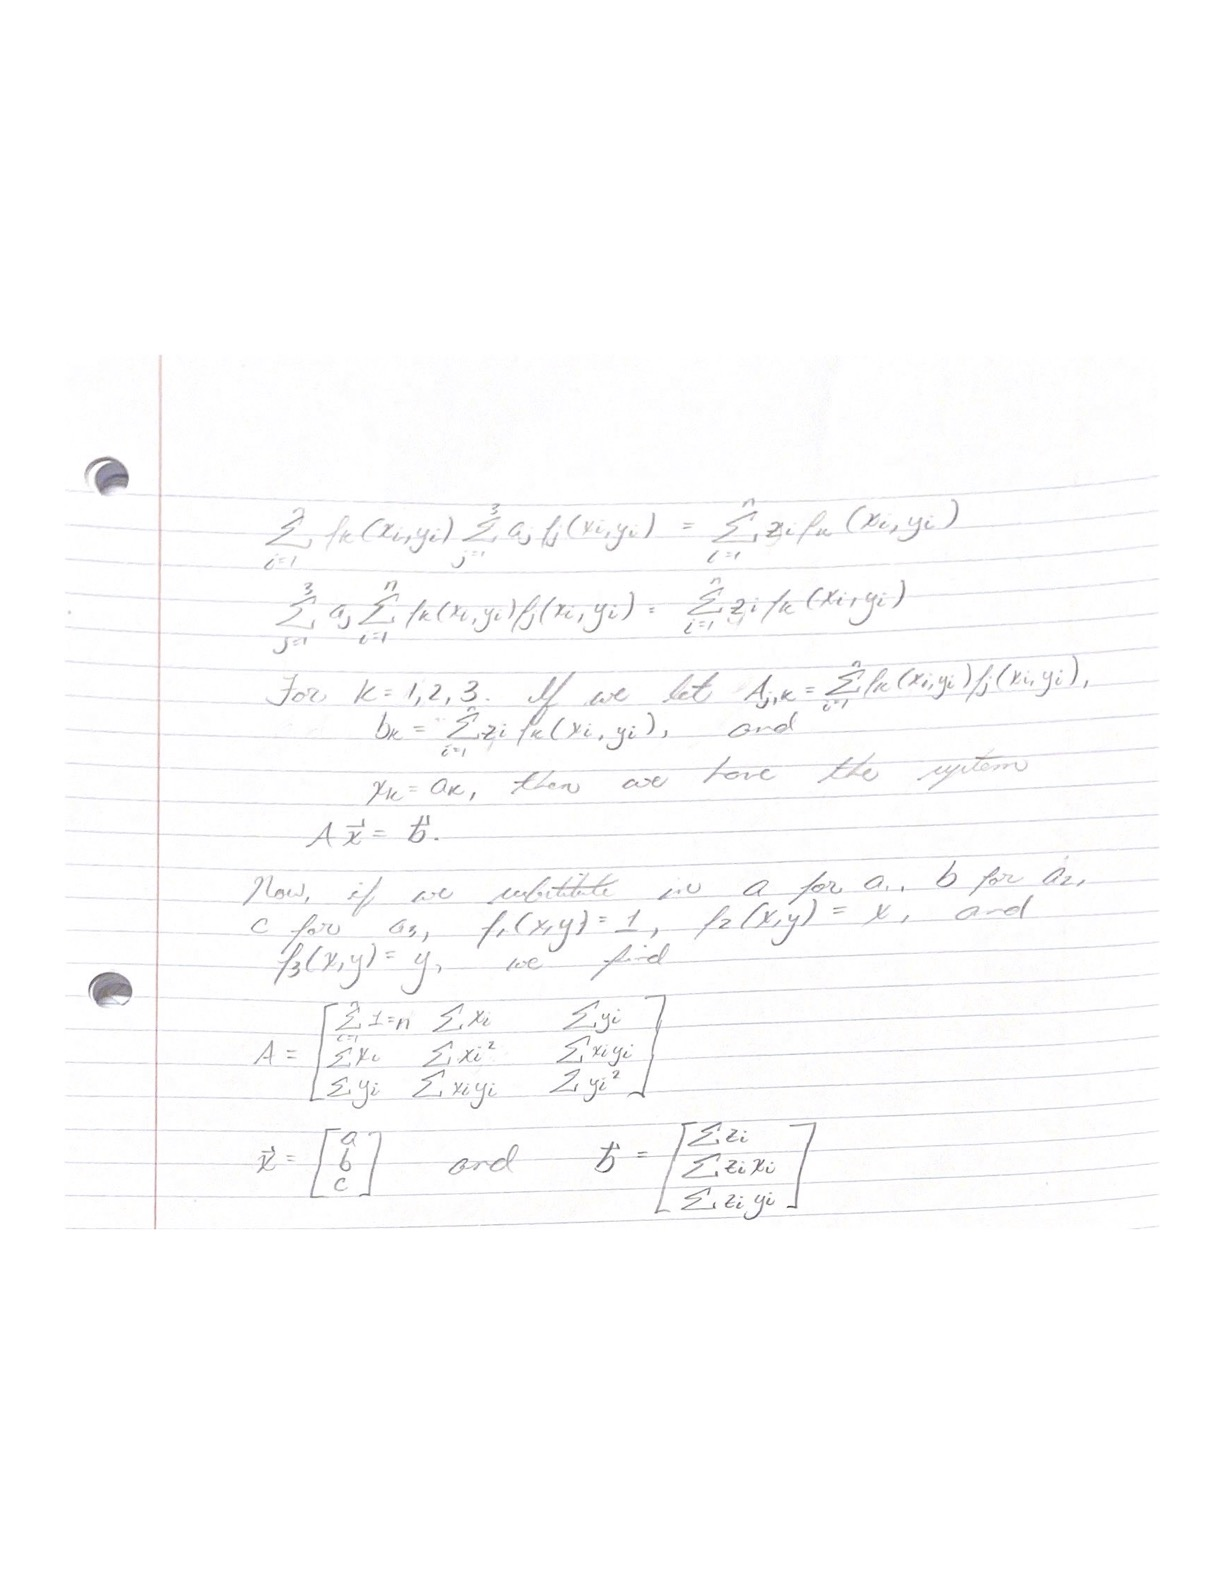

### Problem 18

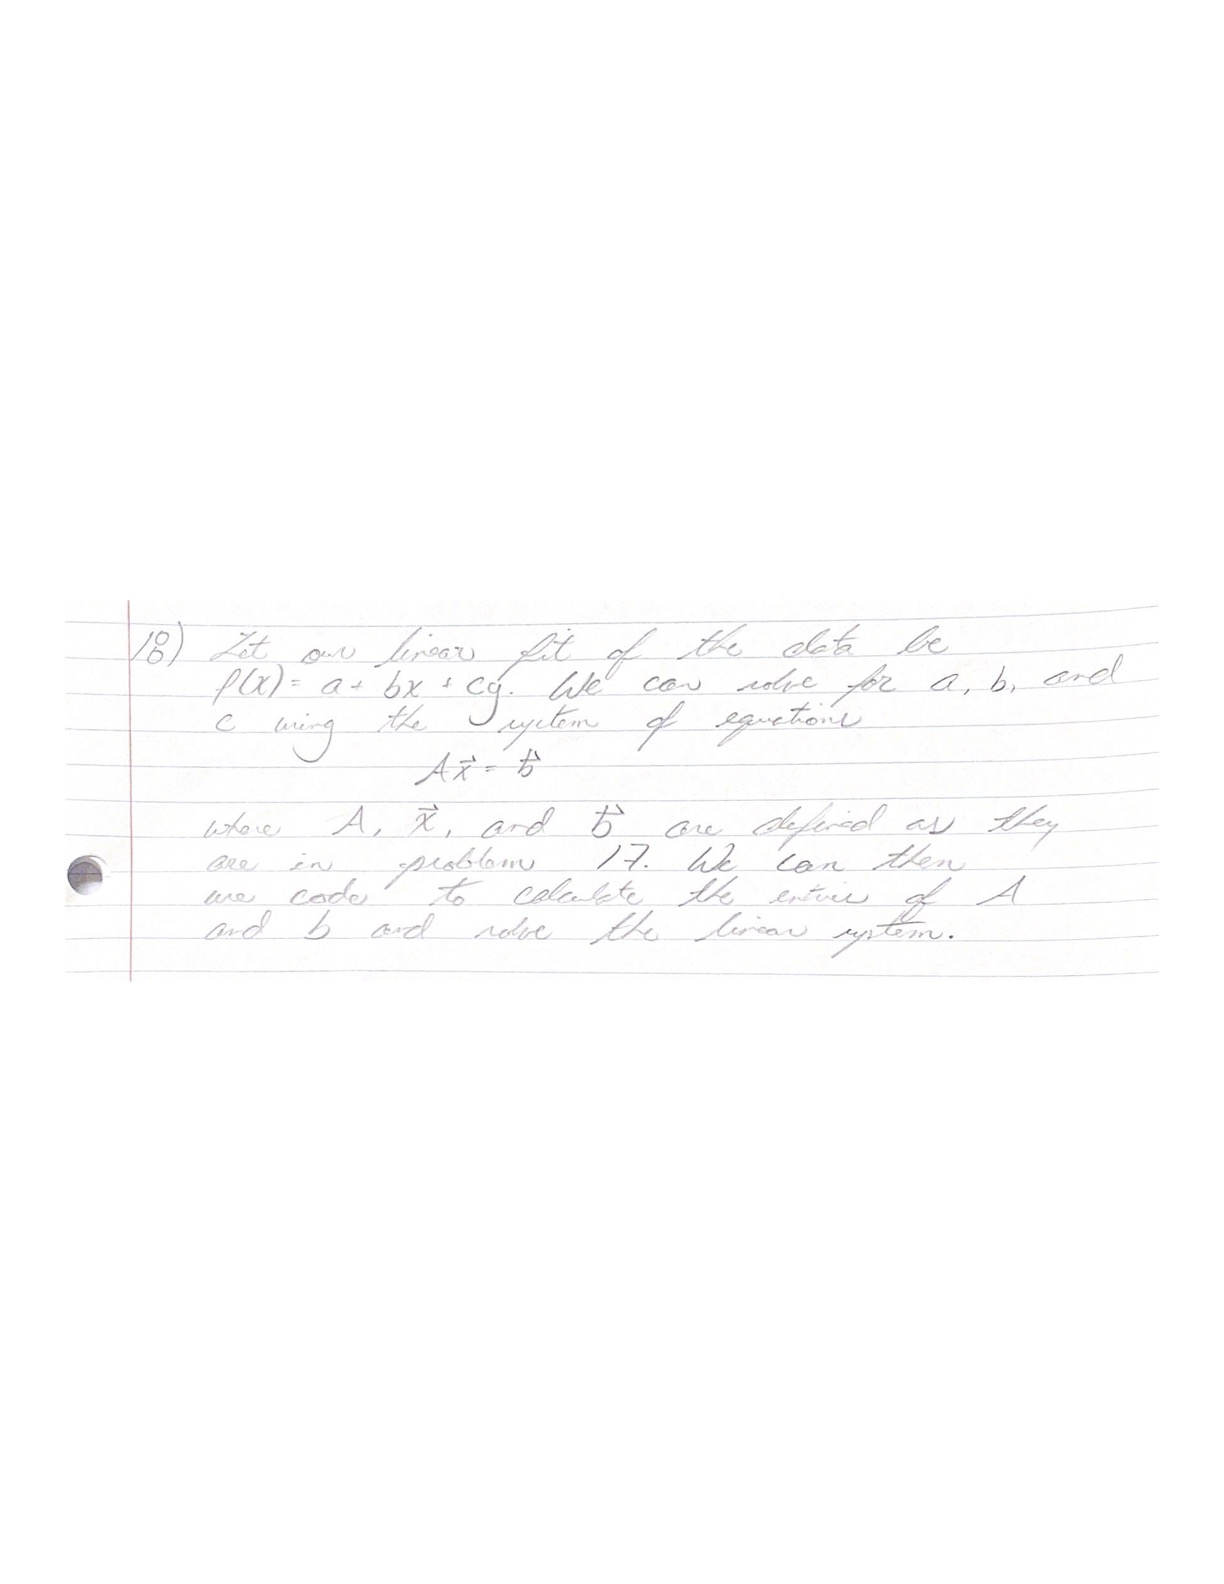

In [24]:
# Define x_data, y_data, z_data, and f = [f_1, f_2, f_3]
x_data = np.array([0,0,1,2,2,2])
y_data = np.array([0,1,0,0,1,2])
z_data = np.array([1.42,1.85,0.78,0.18,0.6,1.05])

f = np.array([lambda x, y: 1, lambda x, y: x, lambda x, y: y])

# Calculate the values for A and b
m = 3
A = np.zeros([m,m])
b = np.zeros([m])

for k in range(m):
  for j in range(m):
    for i in range(len(x_data)):
      A[k,j] += f[k](x_data[i], y_data[i]) * f[j](x_data[i], y_data[i])

for k in range(m):
  for i in range(len(x_data)):
    b[k] += z_data[i] * f[k](x_data[i], y_data[i])

print("A =")
print(A)
print("\nb =", b)

A =
[[ 6.  7.  4.]
 [ 7. 13.  6.]
 [ 4.  6.  6.]]

b = [5.88 4.44 4.55]


We find that

$$A = \begin{bmatrix} 6 & 7 & 4 \\ 7 & 13 & 6 \\ 4 & 6 & 6 \end{bmatrix}$$

and 

$$\vec{b} = \begin{bmatrix} 5.88 \\ 4.44 \\ 4.55 \end{bmatrix}$$

We can now solve $A\vec{x} = \vec{b}$ using code. 

In [25]:
sol = np.linalg.solve(A, b)
print("x =", sol)

x = [ 1.41325581 -0.62139535  0.43755814]


Thus, 

$$\vec{x} = \begin{bmatrix} a \\ b \\ c \end{bmatrix} = \begin{bmatrix} 1.413 \\ -0.621 \\ 0.438 \end{bmatrix}$$

and 

$$f(x) = 1.413 - 0.621 x + 0.438y$$

The data and the linear fit $f(x)$ are plotted below. 

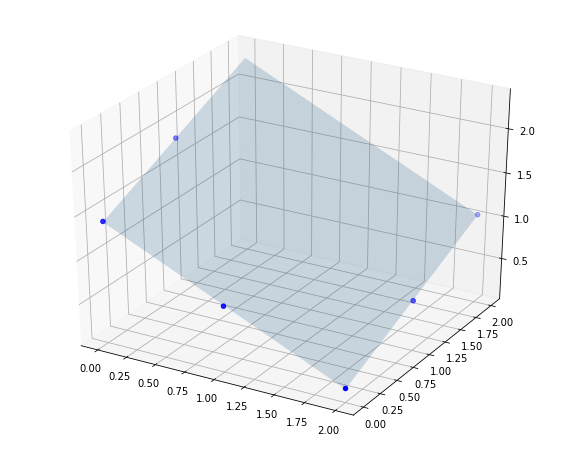

In [26]:
# Configure figure and axes
fig = plt.figure(figsize=[10, 8])
ax = fig.gca(projection='3d')

# Plot the data points
ax.scatter(x_data, y_data, z_data, marker='o', color='blue')

# Define f
f = lambda x, y: sol[0] + sol[1] * x + sol[2] * y

# Plot f and show plot
xx, yy = np.meshgrid(np.linspace(0,2,50), np.linspace(0,2,50))
ax.plot_surface(xx, yy, f(xx, yy), alpha = 0.2, label="f(x, y)")

plt.show()
